# HOMEWORK 14

In this homework we will be working with the Fashion MNIST dataset. You will be given a classifier which suffers from considerable overfitting. Your objective will be to employ regularization techniques to mitigate the overfitting problem.

Let's start with the usual imports.

In [22]:
import os
import cv2
import numpy as np
import tensorflow as tf
import keras.utils
from keras import utils as np_utils
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from time import time
import keras.utils
from keras import utils as np_utils
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Dataset

The MNIST fashgion dataset [link](https://github.com/zalandoresearch/fashion-mnist) was build by Zalando Reasearch tem consists of monochrome images of different type of clothing, namely:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

It is also one of the Keras built-in datasets. Let's load the images and quickly inspect it.

In [23]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


Let's visualise some random samples.

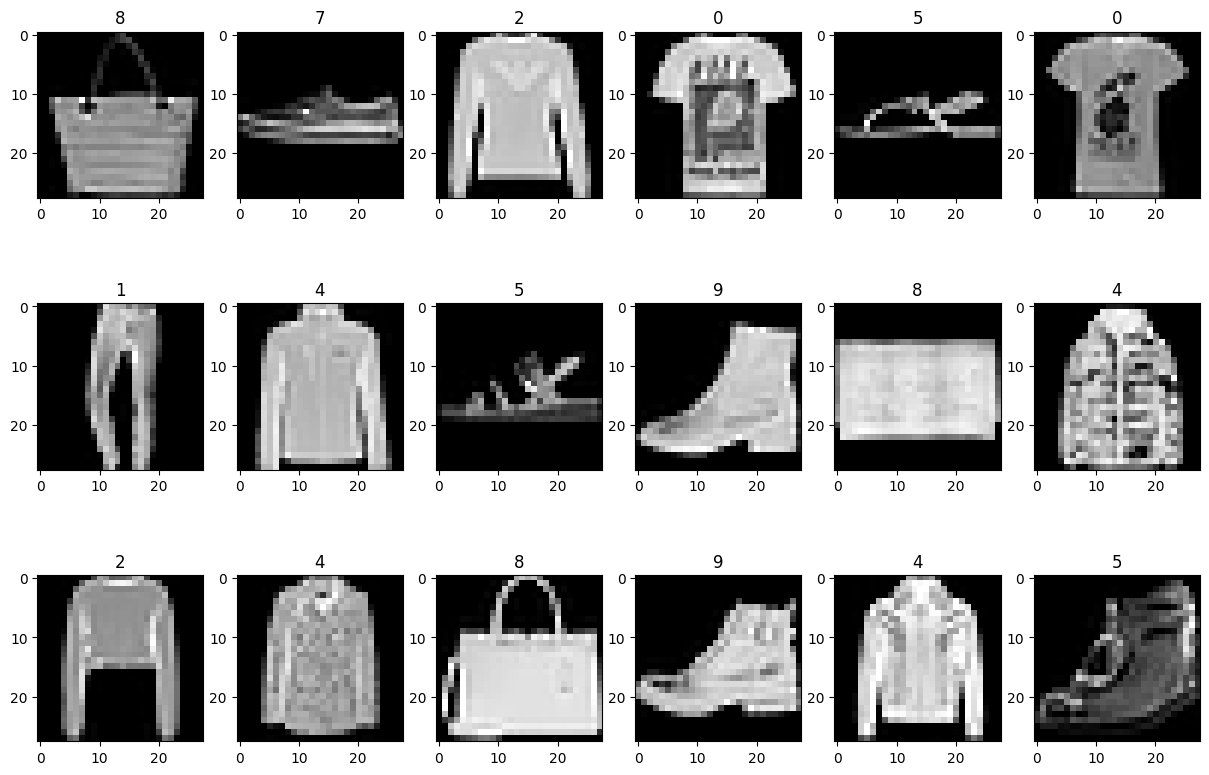

In [5]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

### Building the Classifier

We are now going to build the baseline classifier that you will use throughout this homework.

In [24]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [25]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 flatten_11 (Flatten)        (None, 25088)             0         
                                                                 
 dense_22 (Dense)            (None, 128)               3211392   
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 3,213,002
Trainable params: 3,213,002
Non-trainable params: 0
_________________________________________________________________


In [26]:
epochs = 30
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/30
938/938 [==============================] - 67s 71ms/step - loss: 0.3817 - accuracy: 0.8661 - val_loss: 0.3222 - val_accuracy: 0.8845
Epoch 2/30
938/938 [==============================] - 67s 71ms/step - loss: 0.2606 - accuracy: 0.9066 - val_loss: 0.2960 - val_accuracy: 0.8918
Epoch 3/30
938/938 [==============================] - 67s 71ms/step - loss: 0.2217 - accuracy: 0.9187 - val_loss: 0.2986 - val_accuracy: 0.8970
Epoch 4/30
938/938 [==============================] - 68s 72ms/step - loss: 0.1893 - accuracy: 0.9302 - val_loss: 0.2928 - val_accuracy: 0.8980
Epoch 5/30
938/938 [==============================] - 67s 72ms/step - loss: 0.1668 - accuracy: 0.9395 - val_loss: 0.3214 - val_accuracy: 0.8976
Epoch 6/30
938/938 [==============================] - 70s 75ms/step - loss: 0.1498 - accuracy: 0.9451 - val_loss: 0.3155 - val_accuracy: 0.9002
Epoch 7/30
938/938 [==============================] - 66s 71ms/step - loss: 0.1328 - accuracy: 0.9504 - val_loss: 0.3412 - val_accuracy:

Train Acc      0.9909499883651733
Validation Acc 0.887499988079071


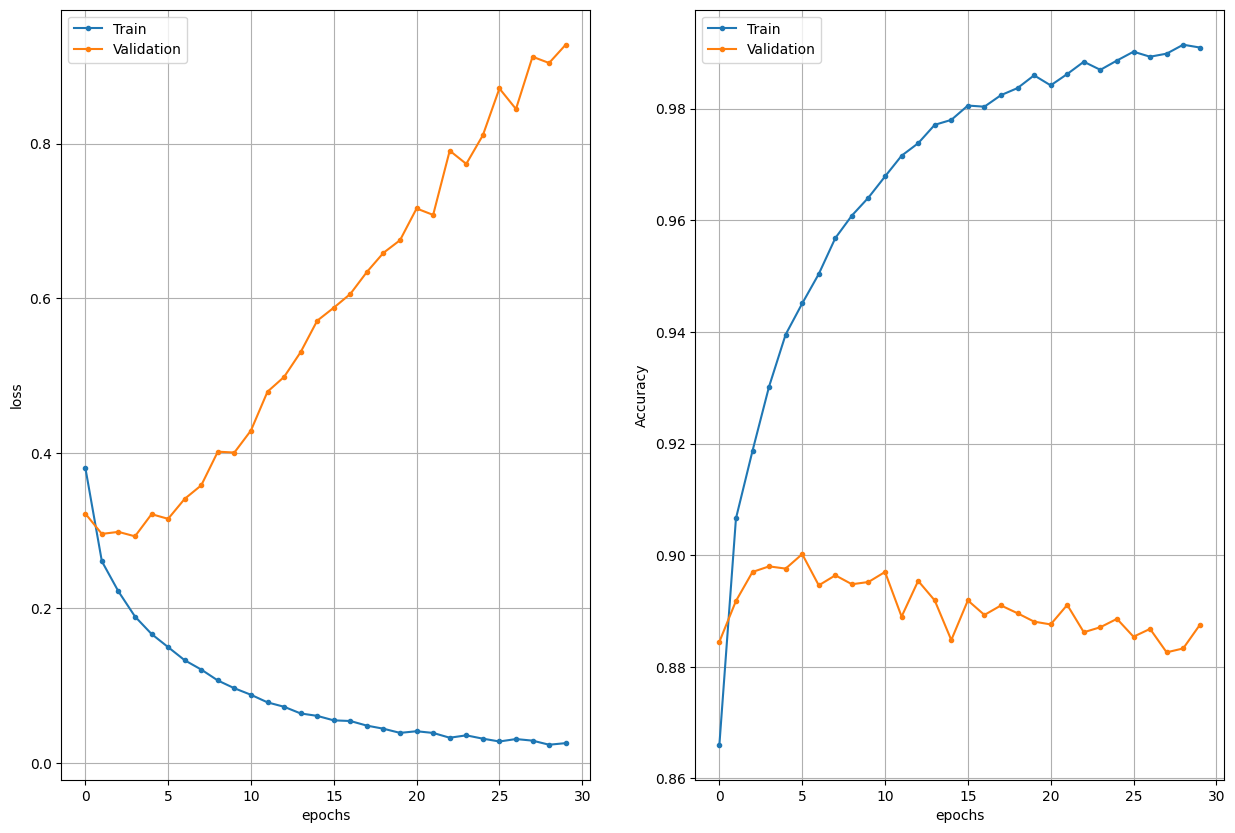

In [27]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

As you can see, the classifier suffers from massive overfitting. The validation accuracy is around 88% while the training accuracy is close to 1.

### Combat the Overfitting!

Now it is your turn. Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.,
* Dropout
* Batch normalization
* Weight regularization
* Data augmentation
* Early stopping
* Pooling
* Reducing the number of parameters (the size of the network)
* ...

There are to objective you shall fulfill in order to successfully complete this homework:
* The validation accuracy shall be above 91%
* Your network (with all the regularizations applied) shall **not** be larger than the baseline

In [28]:
#more complicated model with dropout

inputs = Input(shape=(28, 28, 1))

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
net = Dropout(0.2)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()



model = Model(inputs, outputs)
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_12 (Flatten)        (None, 800)               0  

In [29]:
epochs = 30
batch_size = 50

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/30
1200/1200 [==============================] - 45s 25ms/step - loss: 0.6010 - accuracy: 0.7800 - val_loss: 0.4332 - val_accuracy: 0.8489
Epoch 2/30
1200/1200 [==============================] - 30s 25ms/step - loss: 0.4127 - accuracy: 0.8517 - val_loss: 0.3865 - val_accuracy: 0.8613
Epoch 3/30
1200/1200 [==============================] - 31s 26ms/step - loss: 0.3659 - accuracy: 0.8696 - val_loss: 0.3545 - val_accuracy: 0.8758
Epoch 4/30
1200/1200 [==============================] - 29s 25ms/step - loss: 0.3394 - accuracy: 0.8779 - val_loss: 0.3298 - val_accuracy: 0.8828
Epoch 5/30
1200/1200 [==============================] - 30s 25ms/step - loss: 0.3198 - accuracy: 0.8837 - val_loss: 0.3191 - val_accuracy: 0.8859
Epoch 6/30
1200/1200 [==============================] - 31s 26ms/step - loss: 0.3073 - accuracy: 0.8871 - val_loss: 0.3046 - val_accuracy: 0.8891
Epoch 7/30
1200/1200 [==============================] - 30s 25ms/step - loss: 0.2948 - accuracy: 0.8932 - val_loss: 0.3054 -

Train Acc      0.9222999811172485
Validation Acc 0.9072999954223633


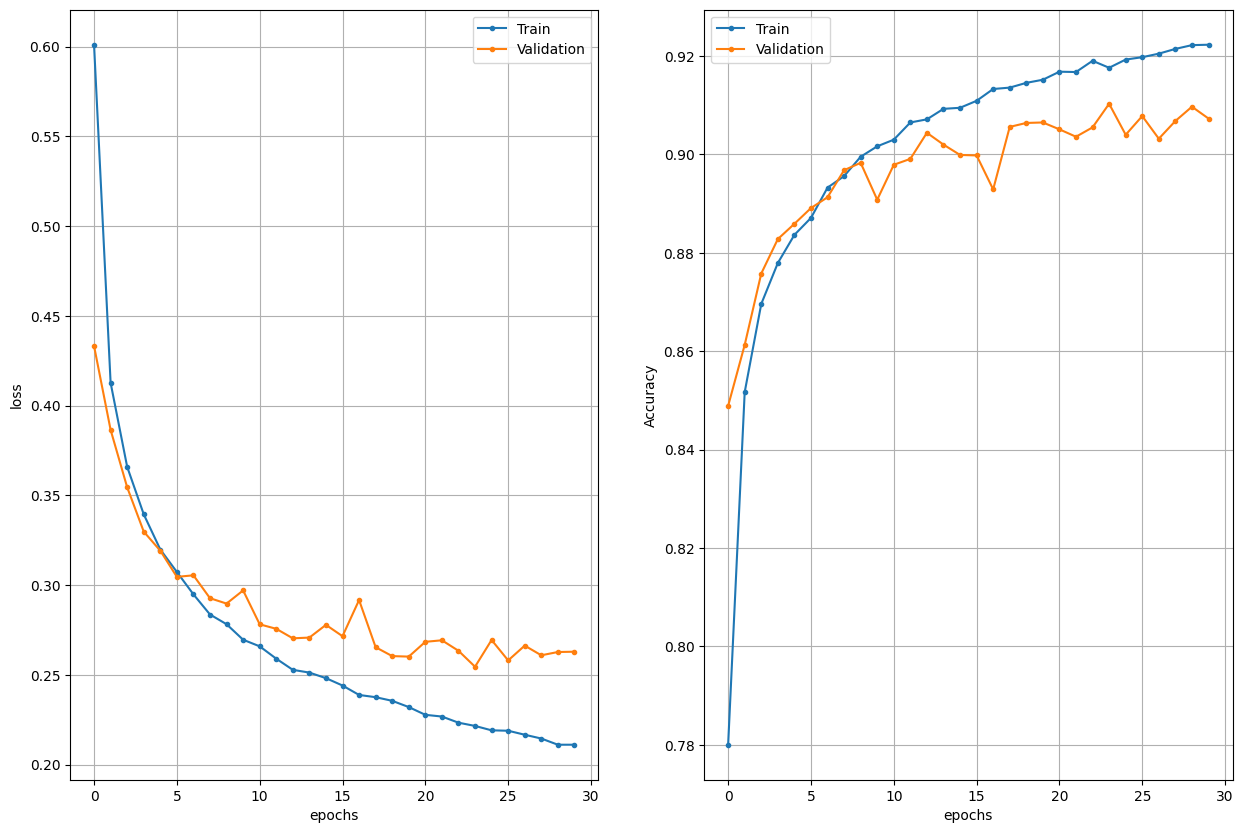

In [30]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)



In [31]:
#batch normalization added
inputs = Input(shape=(28, 28, 1))

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = BatchNormalization()(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
net = Dropout(0.2)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()



model = Model(inputs, outputs)
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 batch_normalization (BatchN  (None, 11, 11, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0  

In [32]:
epochs = 30
batch_size = 50

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/30
1200/1200 [==============================] - 33s 27ms/step - loss: 0.4797 - accuracy: 0.8264 - val_loss: 0.3759 - val_accuracy: 0.8652
Epoch 2/30
1200/1200 [==============================] - 33s 27ms/step - loss: 0.3483 - accuracy: 0.8720 - val_loss: 0.3541 - val_accuracy: 0.8703
Epoch 3/30
1200/1200 [==============================] - 32s 26ms/step - loss: 0.3176 - accuracy: 0.8844 - val_loss: 0.3135 - val_accuracy: 0.8862
Epoch 4/30
1200/1200 [==============================] - 33s 28ms/step - loss: 0.2973 - accuracy: 0.8907 - val_loss: 0.3065 - val_accuracy: 0.8915
Epoch 5/30
1200/1200 [==============================] - 32s 27ms/step - loss: 0.2851 - accuracy: 0.8949 - val_loss: 0.3373 - val_accuracy: 0.8762
Epoch 6/30
1200/1200 [==============================] - 33s 27ms/step - loss: 0.2742 - accuracy: 0.8993 - val_loss: 0.3048 - val_accuracy: 0.8851
Epoch 7/30
1200/1200 [==============================] - 32s 26ms/step - loss: 0.2688 - accuracy: 0.9010 - val_loss: 0.3103 -

Train Acc      0.924916684627533
Validation Acc 0.901199996471405


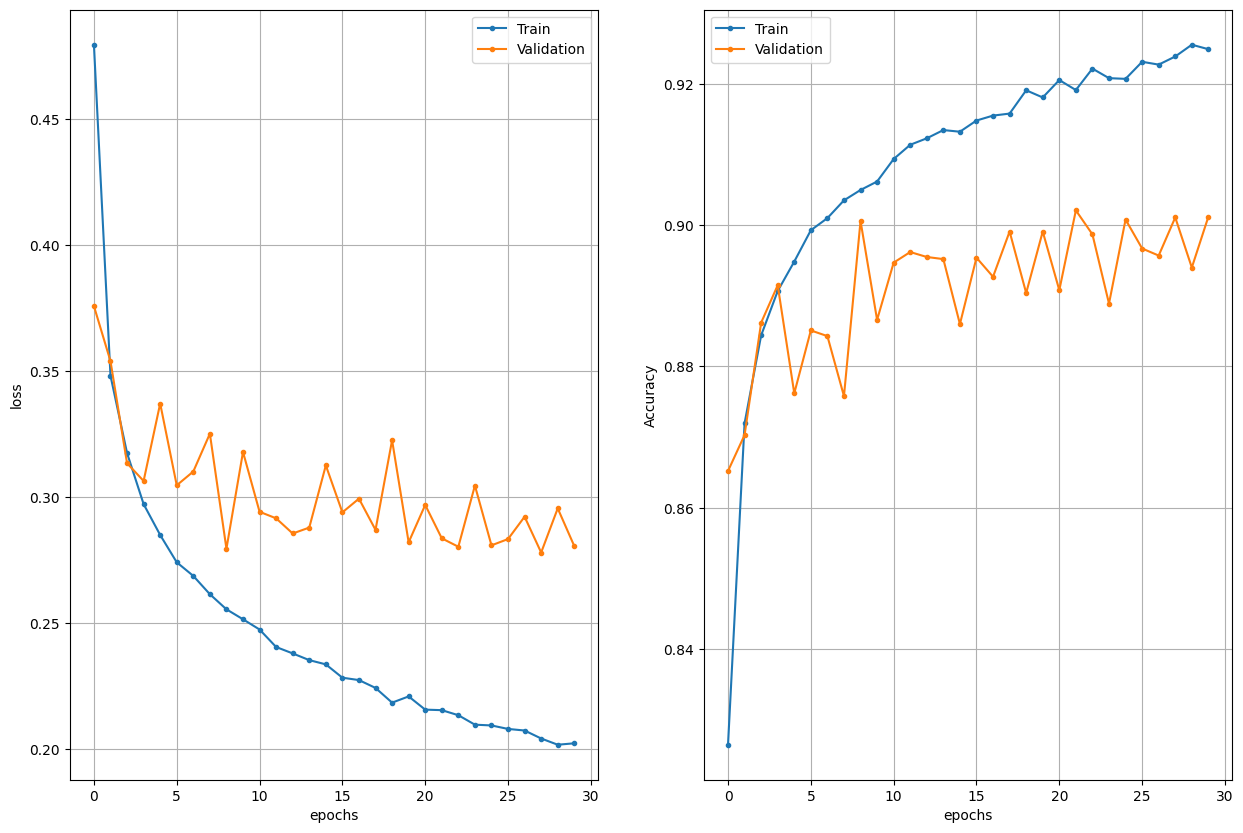

In [34]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

In [35]:
# using image augmentation

from sklearn.utils import shuffle
import numpy as np

def datagen(x, y, batch_size):
    num_samples = len(y)
    while True:
        for idx in range(0, num_samples, batch_size):
            x_ = x[idx:idx + batch_size, ...]
            y_ = y[idx:idx + batch_size]
            
            if len(y_) < batch_size:
                x, y = shuffle(x, y)
                break
            
            # Augmentation
            for idx_aug in range(batch_size):
                if np.random.rand() > 0.5:
                    x_[idx_aug, ...] = np.rot90(x_[idx_aug, ...])
                    x_[idx_aug, ...]  = np.flipud(x_[idx_aug, ...])   
                    
            yield x_, y_

In [36]:
epochs = 30
batch_size = 64
steps_per_epoch = len(y_train) // batch_size
generator = datagen(x_train, y_train, batch_size)
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(generator, steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/30
937/937 [==============================] - 35s 37ms/step - loss: 0.5544 - accuracy: 0.8130 - val_loss: 0.3507 - val_accuracy: 0.8743
Epoch 2/30
937/937 [==============================] - 34s 36ms/step - loss: 0.3872 - accuracy: 0.8602 - val_loss: 0.3301 - val_accuracy: 0.8844
Epoch 3/30
937/937 [==============================] - 33s 35ms/step - loss: 0.3608 - accuracy: 0.8695 - val_loss: 0.3275 - val_accuracy: 0.8842
Epoch 4/30
937/937 [==============================] - 34s 37ms/step - loss: 0.3443 - accuracy: 0.8750 - val_loss: 0.3272 - val_accuracy: 0.8847
Epoch 5/30
937/937 [==============================] - 33s 35ms/step - loss: 0.3332 - accuracy: 0.8788 - val_loss: 0.3192 - val_accuracy: 0.8884
Epoch 6/30
937/937 [==============================] - 34s 36ms/step - loss: 0.3229 - accuracy: 0.8825 - val_loss: 0.3227 - val_accuracy: 0.8848
Epoch 7/30
937/937 [==============================] - 33s 35ms/step - loss: 0.3177 - accuracy: 0.8841 - val_loss: 0.3632 - val_accuracy:

Train Acc      0.8968783617019653
Validation Acc 0.8855000138282776


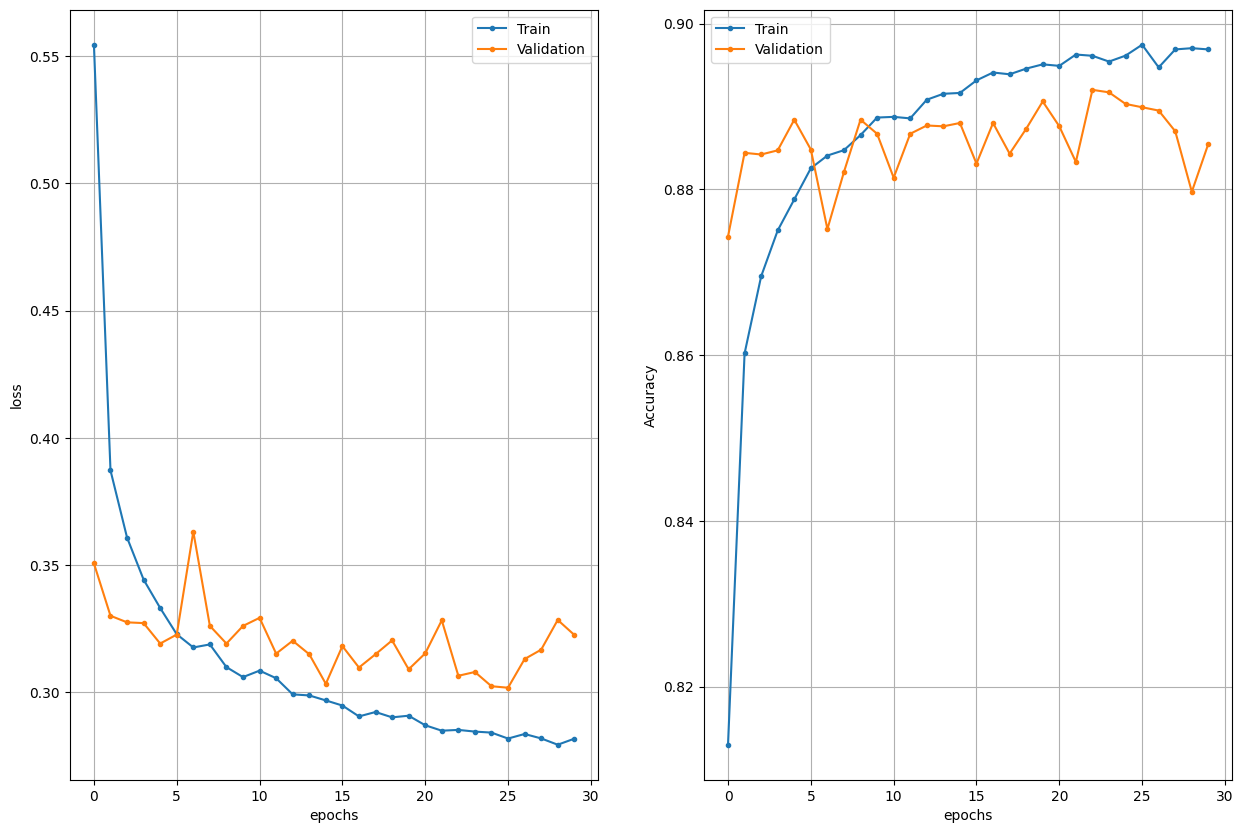

In [37]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

In [39]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()


datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


epochs = 50
batch_size = 32
steps_per_epoch = len(y_train) // batch_size
x_train = x_train.reshape((1,) + x_train.shape) 
y_train = y_train.reshape((1,) + y_train.shape) 
generator = datagen.flow(x_train, y_train, batch_size)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(generator, steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data=(x_test, y_test))


Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 flatten_15 (Flatten)        (None, 25088)             0         
                                                                 
 dense_28 (Dense)            (None, 128)               3211392   
                                                                 
 dense_29 (Dense)            (None, 10)                1290      
                                                                 
Total params: 3,213,002
Trainable params: 3,213,002
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 60000, 28, 28) (28 channels).
  warnings.warn(


Epoch 1/50


UnimplementedError: ignored

### Questions

* What have you done in order to improve the performance?
* Have you tried configurations that did not work out?

1) To improve the performance I used 3 methods:
1. Make the model more complicated by adding new layers. pooling and using dropout. The result really enhanced. Train and validation accuracy differ only slightly.
2. Add the layer with batch normalizaton. It increased the validation accuracy, but not drastically.
3. Use image augmentation by using rotation and flipud. The result was pretty ok, but the general level of the accuracy was not higher than 90%.
4. Try to use ImageDataGenerator, but not sucessfully. Could you please explain what the error is.

2) My try to use ImageDataGenerator, but I think it related to some syntax issue.